In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset=load_diabetes()
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables
print(diabetes_dataset.keys())
data=diabetes_dataset['data']
targets=diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
# Normalise the target data (this will make clearer training curves)
targets=(targets-targets.mean(axis=0))/targets.std()


In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model=Sequential([
        Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1)
    ])
    return model

model=get_model()


In [7]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['mae'])


In [15]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0306 - mae: 0.8649 - val_loss: 0.8204 - val_mae: 0.7713
Epoch 2/100
337/337 - 0s - loss: 0.9660 - mae: 0.8390 - val_loss: 0.7002 - val_mae: 0.7108
Epoch 3/100
337/337 - 0s - loss: 0.8343 - mae: 0.7705 - val_loss: 0.5188 - val_mae: 0.6020
Epoch 4/100
337/337 - 0s - loss: 0.6439 - mae: 0.6668 - val_loss: 0.4982 - val_mae: 0.5766
Epoch 5/100
337/337 - 0s - loss: 0.5488 - mae: 0.6023 - val_loss: 0.4546 - val_mae: 0.5503
Epoch 6/100
337/337 - 0s - loss: 0.5103 - mae: 0.5841 - val_loss: 0.4929 - val_mae: 0.5839
Epoch 7/100
337/337 - 0s - loss: 0.5076 - mae: 0.5593 - val_loss: 0.7627 - val_mae: 0.7060
Epoch 8/100
337/337 - 0s - loss: 0.5496 - mae: 0.5884 - val_loss: 0.5048 - val_mae: 0.5805
Epoch 9/100
337/337 - 0s - loss: 0.4874 - mae: 0.5550 - val_loss: 0.5582 - val_mae: 0.6155
Epoch 10/100
337/337 - 0s - loss: 0.4718 - mae: 0.5556 - val_loss: 0.4575 - val_mae: 0.5547
Epoch 11/100
337/337 - 0s - loss: 0.5005 - m

Epoch 90/100
337/337 - 0s - loss: 0.0230 - mae: 0.1128 - val_loss: 0.9874 - val_mae: 0.7657
Epoch 91/100
337/337 - 0s - loss: 0.0261 - mae: 0.1233 - val_loss: 0.9496 - val_mae: 0.7612
Epoch 92/100
337/337 - 0s - loss: 0.0275 - mae: 0.1259 - val_loss: 1.0273 - val_mae: 0.7768
Epoch 93/100
337/337 - 0s - loss: 0.0242 - mae: 0.1188 - val_loss: 1.0233 - val_mae: 0.7673
Epoch 94/100
337/337 - 0s - loss: 0.0187 - mae: 0.1006 - val_loss: 1.0098 - val_mae: 0.7720
Epoch 95/100
337/337 - 0s - loss: 0.0170 - mae: 0.0972 - val_loss: 1.0204 - val_mae: 0.7732
Epoch 96/100
337/337 - 0s - loss: 0.0144 - mae: 0.0868 - val_loss: 1.0526 - val_mae: 0.7849
Epoch 97/100
337/337 - 0s - loss: 0.0139 - mae: 0.0872 - val_loss: 1.0244 - val_mae: 0.7792
Epoch 98/100
337/337 - 0s - loss: 0.0131 - mae: 0.0845 - val_loss: 1.0475 - val_mae: 0.7848
Epoch 99/100
337/337 - 0s - loss: 0.0131 - mae: 0.0854 - val_loss: 0.9793 - val_mae: 0.7648
Epoch 100/100
337/337 - 0s - loss: 0.0169 - mae: 0.1045 - val_loss: 1.0465 - val

In [16]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets,verbose=2)


45/1 - 0s - loss: 0.5390 - mae: 0.6120


[0.6062186320622762, 0.611954]

#### Plot the learning curves

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

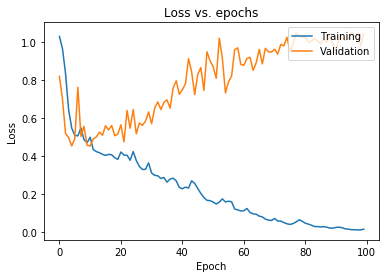

In [19]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [13]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [11]:
# Re-build the model with weight decay and dropout layers
model=get_regularised_model(1e-5,0.3)


In [12]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [43]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data,train_targets,epochs=100,
         validation_split=0.15, batch_size=64, verbose=2)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0451 - mae: 0.8681 - val_loss: 0.8609 - val_mae: 0.7862
Epoch 2/100
337/337 - 0s - loss: 1.0322 - mae: 0.8650 - val_loss: 0.8304 - val_mae: 0.7724
Epoch 3/100
337/337 - 0s - loss: 1.0049 - mae: 0.8534 - val_loss: 0.7488 - val_mae: 0.7340
Epoch 4/100
337/337 - 0s - loss: 0.9114 - mae: 0.8112 - val_loss: 0.5878 - val_mae: 0.6442
Epoch 5/100
337/337 - 0s - loss: 0.7382 - mae: 0.7189 - val_loss: 0.4962 - val_mae: 0.5870
Epoch 6/100
337/337 - 0s - loss: 0.6868 - mae: 0.6882 - val_loss: 0.4464 - val_mae: 0.5404
Epoch 7/100
337/337 - 0s - loss: 0.6466 - mae: 0.6461 - val_loss: 0.4181 - val_mae: 0.5344
Epoch 8/100
337/337 - 0s - loss: 0.6120 - mae: 0.6417 - val_loss: 0.5346 - val_mae: 0.6179
Epoch 9/100
337/337 - 0s - loss: 0.6125 - mae: 0.6491 - val_loss: 0.4407 - val_mae: 0.5567
Epoch 10/100
337/337 - 0s - loss: 0.5917 - mae: 0.6291 - val_loss: 0.4885 - val_mae: 0.5855
Epoch 11/100
337/337 - 0s - loss: 0.5902 - m

Epoch 90/100
337/337 - 0s - loss: 0.3630 - mae: 0.4663 - val_loss: 0.5807 - val_mae: 0.6277
Epoch 91/100
337/337 - 0s - loss: 0.3545 - mae: 0.4648 - val_loss: 0.5928 - val_mae: 0.6222
Epoch 92/100
337/337 - 0s - loss: 0.3953 - mae: 0.4764 - val_loss: 0.5624 - val_mae: 0.6137
Epoch 93/100
337/337 - 0s - loss: 0.3470 - mae: 0.4562 - val_loss: 0.5615 - val_mae: 0.6158
Epoch 94/100
337/337 - 0s - loss: 0.3620 - mae: 0.4703 - val_loss: 0.5826 - val_mae: 0.6266
Epoch 95/100
337/337 - 0s - loss: 0.3838 - mae: 0.4919 - val_loss: 0.5546 - val_mae: 0.6132
Epoch 96/100
337/337 - 0s - loss: 0.3611 - mae: 0.4636 - val_loss: 0.5426 - val_mae: 0.5996
Epoch 97/100
337/337 - 0s - loss: 0.3527 - mae: 0.4605 - val_loss: 0.6334 - val_mae: 0.6640
Epoch 98/100
337/337 - 0s - loss: 0.3829 - mae: 0.4747 - val_loss: 0.5904 - val_mae: 0.6300
Epoch 99/100
337/337 - 0s - loss: 0.3838 - mae: 0.4784 - val_loss: 0.5871 - val_mae: 0.6363
Epoch 100/100
337/337 - 0s - loss: 0.3638 - mae: 0.4683 - val_loss: 0.5644 - val

In [44]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.4873 - mae: 0.5266


[0.42223157352871366, 0.5266151]

#### Plot the learning curves

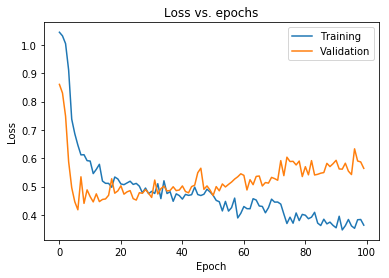

In [45]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [18]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training...")
    
    def on_epoch_begin(self,epoch,logs=None):
        print(f"Training: Starting epoch {epoch}")
        
    def on_train_batch_begin(self,batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self,batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self,epoch,logs=None):
        print(f"Training: Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")


In [22]:
# Re-build the model
model=get_regularised_model(1e-5, 0.3)


In [23]:
# Compile the model
model.compile(optimizer='adam',loss='mse')


#### Train the model with the callback

In [24]:
# Train the model, with some of the data reserved for validation
model.fit(train_data,train_targets,epochs=3, batch_size=128, verbose=0, callbacks=[TrainingCallback()])


Starting training...
Training: Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Finished epoch 0
Training: Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Finished epoch 1
Training: Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Finished epoch 2
Finished training!


In [25]:
# Evaluate the model
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing...")
    
    def on_test_batch_begin(self,batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self,batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")
        
model.evaluate(test_data,test_targets,verbose=0,callbacks=[TestingCallback()])


Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.8078154120180342

In [26]:
# Make predictions with the model
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
    
    def on_predict_batch_begin(self,batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self,batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

model.predict(test_data,verbose=0, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[-0.04391373],
       [ 0.04330269],
       [ 0.11698695],
       [ 0.10980383],
       [-0.06978577],
       [ 0.01927187],
       [-0.06727215],
       [-0.04809001],
       [ 0.03759479],
       [ 0.09863643],
       [ 0.04647472],
       [ 0.08554997],
       [ 0.14359525],
       [-0.01867247],
       [ 0.15670069],
       [ 0.11469959],
       [ 0.10556058],
       [-0.04697593],
       [ 0.09316707],
       [ 0.01752669],
       [-0.02787141],
       [-0.05912691],
       [ 0.00945122],
       [-0.05516326],
       [-0.06137125],
       [ 0.09888145],
       [ 0.05152766],
       [ 0.05429887],
       [-0.05036332],
       [ 0.11563343],
       [-0.04893747],
       [ 0.06531253],
       [ 0.01513608],
       [ 0.0908623 ],
       [-0.04369934],
       [ 0.13447347],
       [ 0.02363477],
       [-0.04314851],
       [ 0.10426196],
       [ 0.00567603],
       [-0.02096766],
       [-0.07565626],
       [-0.06626256],
       [-0.03475565],
       [ 0.05778319]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [26]:
# Re-train the unregularised model
unregularised_model=get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history=unregularised_model.fit(train_data,train_targets, epochs=100,
                                     validation_split=0.15, batch_size=64,
                                     verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [27]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.6492


0.5675164116753473

In [24]:
# Re-train the regularised model
regularised_model=get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history=regularised_model.fit(train_data,train_targets,epochs=100,
                                 validation_split=0.15, batch_size=64, verbose=0,
                                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [28]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.6686


0.5159734222624037

#### Plot the learning curves

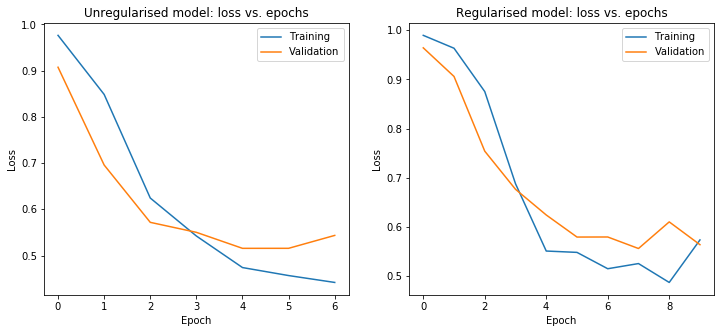

In [29]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()